## Native solution for 0/1 knapsack problem

In [4]:
# A naive recursive implementation of 0-1 Knapsack Problem
  
# Returns the maximum value that can be put in a knapsack of
# capacity W
def knapSack(W, wt, val, n):
  
    # Base Case
    if n == 0 or W == 0 :
        return 0
  
    # If weight of the nth item is more than Knapsack of capacity
    # W, then this item cannot be included in the optimal solution
    if (wt[n-1] > W):
        return knapSack(W, wt, val, n-1)
  
    # return the maximum of two cases:
    # (1) nth item included
    # (2) not included
    else:
        return max(val[n-1] + knapSack(W-wt[n-1], wt, val, n-1),
                   knapSack(W, wt, val, n-1))
  
# end of function knapSack
  
# To test above function
val = [135, 139, 149, 150, 156, 163, 173, 184, 192, 201, 210, 214, 221, 229, 240]
wt = [70, 73, 77, 80, 82, 87, 90, 94, 98, 106, 110, 113, 115, 118, 120]
W = 750
n = len(val)

In [7]:
# A Dynamic Programming based Python 
# Program for 0-1 Knapsack problem
# Returns the maximum value that can 
# be put in a knapsack of capacity W
def knapSack(W, wt, val, n):
    K = [[0 for x in range(W + 1)] for x in range(n + 1)]
  
    # Build table K[][] in bottom up manner
    for i in range(n + 1):
        for w in range(W + 1):
            if i == 0 or w == 0:
                K[i][w] = 0
            elif wt[i-1] <= w:
                K[i][w] = max(val[i-1] + K[i-1][w-wt[i-1]],  K[i-1][w])
            else:
                K[i][w] = K[i-1][w]
  
    return K[n][W]

In [8]:
%time
knapSack(W, wt, val, n)

CPU times: user 1 µs, sys: 1 µs, total: 2 µs
Wall time: 2.86 µs


1458

## First choice Hill Climbling(HC)

In [127]:
 # Define translation from decimal to binary 
def dec_to_bin(dec_num, digits): 
    quotient = dec_num
    bin_num = []

    if dec_num == 1 | 0:
        bin_num.append(dec_num)
        while(len(bin_num)!= digits):
            bin_num.append(0)
        return bin_num
    
    while(quotient > 0): 
        reminders = dec_num % 2 
        quotient = (dec_num - reminders) // 2 
        dec_num = quotient 
        bin_num.append(reminders)
    while(len(bin_num)!= digits):
        bin_num.append(0)

    bin_num = bin_num[::-1]
    return bin_num

dec_to_bin(783,10)

[1, 1, 0, 0, 0, 0, 1, 1, 1, 1]

In [ ]:
# Define the problem instance
val = [135, 139, 149, 150, 156, 163, 173, 184, 192, 201, 210, 214, 221, 229, 240]
wt = [70, 73, 77, 80, 82, 87, 90, 94, 98, 106, 110, 113, 115, 118, 120]
W = 750

In [68]:
import random

# Define the fitness function that returns the total value of a given solution 
def fitness(solution): 
    # Initialize the variable
    total_wt, total_val = 0, 0

    # Iterate through the input string to calculate the weights & profits
    for idx in range(len(solution)):
        if solution[idx] == 1:
            total_wt += wt[idx] # sum the weight
            total_val += val[idx] # sum the value

    # If either smaller or equal to weight restrain, return the total_val
    if total_wt <= W: 
        return total_val 
    # Otherwise, return 0
    return 0

# Define the neighborhood function
def get_neighbor(current_solution):
    neighbor = current_solution.copy()
    index = random.randint(0, len(current_solution)-1)
    neighbor[index] = 1 - neighbor[index]
    return neighbor

def hill_climbing():
    # Initialize the current solution
    current_solution = [random.randint(0, 1) for _ in range(len(val))] 
    current_fitness = fitness(current_solution)

    # Iterate until no better neighbor is found
    while True:
        # Get a neighbor solution
        neighbor_solution = get_neighbor(current_solution)
        neighbor_fitness = fitness(neighbor_solution)

        # If the neighbor is better, update the current solution
        if neighbor_fitness >= current_fitness:
            current_solution = neighbor_solution
            current_fitness = neighbor_fitness
        # Otherwise, terminate and return the best solution found
        else:
            return current_solution, current_fitness
        
best_solution, best_fitness = hill_climbing()

# Print the results
# print("Best Solution:", best_solution)
# print("Best Fitness:", best_fitness)

# Define the loop iterates apply HC algo.
def HC_loop(iterate):
    condition = True # Flag for while-loop
    hc_results = [] # Store each iterateion result
    index, temp = 0, 0 # Temporary variables
    while condition:
        # First iterative of HC 
        best_solution, best_fitness = hill_climbing()

        # Find optimonal solution, either equal or greater than the previous one
        if best_fitness >= temp:
            hc_results.append(best_fitness)
            temp = best_fitness
            index += 1

        # 500 iterations     
        if index == iterate:
            condition = False
            return hc_results, best_fitness

In [64]:
iterate = 500
hc_results, best_fiteness = HC_loop(iterate)
best_fiteness

1458

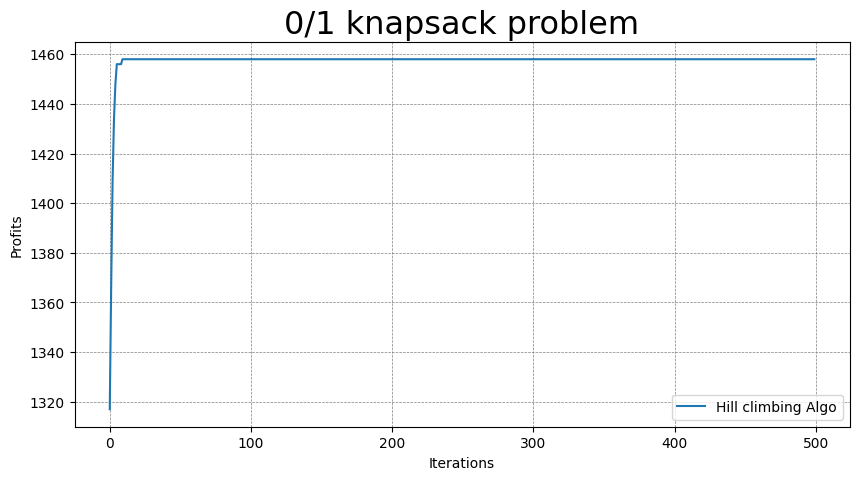

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

plt.xlabel('Iterations')
plt.ylabel('Profits')
plt.title('0/1 knapsack problem',size='23')

plt.plot(hc_results, label='Hill climbing Algo')
plt.legend(loc='lower right')
plt.savefig('./01_knapsack_HC.png')

plt.show()

# Simulated annealing(SA)

In [49]:
import random
import math

# Define the fitness function that returns the total value of a given solution
def fitness(solution):
    total_value = 0
    total_weight = 0
    for i in range(len(solution)):
        if solution[i] == 1:
            total_value += val[i]
            total_weight += wt[i]
    if total_weight > W:
        return 0
    return total_value

# Define the Simulated Annealing algorithm
def simulated_annealing(max_iterations, initial_temperature, cooling_rate):
    # Initialize the current solution randomly
    current_solution = [random.randint(0, 1) for _ in range(len(val))]
    current_fitness = fitness(current_solution)
    best_solution = current_solution.copy()
    best_fitness = current_fitness
    
    for i in range(max_iterations):
        # Generate a neighbor solution by flipping a random bit
        index = random.randint(0, len(val) - 1)
        neighbor_solution = current_solution.copy()
        neighbor_solution[index] = 1 - neighbor_solution[index]
        neighbor_fitness = fitness(neighbor_solution)
        
        # Calculate the acceptance probability based on the current temperature
        temperature = initial_temperature * math.pow(cooling_rate, i)
        delta_fitness = neighbor_fitness - current_fitness
        acceptance_probability = math.exp(delta_fitness / temperature)
        
        # If the neighbor solution is better or accepted, update the current solution
        if neighbor_fitness > current_fitness or random.random() < acceptance_probability:
            current_solution = neighbor_solution
            current_fitness = neighbor_fitness
        
        # Update the best solution if necessary
        if current_fitness > best_fitness:
            best_solution = current_solution.copy()
            best_fitness = current_fitness
    
    return best_solution, best_fitness

# Call the Simulated Annealing algorithm and print the results
# best_solution, best_fitness = simulated_annealing(100, 1000, 0.99)
# print("Solution:", best_solution)
# print("Fitness:", best_fitness)

# Define the loop iterates apply SA algo.
def SA_loop(iterate,max_iterations, initial_temperature, cooling_rate):

    condition = True # Flag for while-loop
    sa_results = [] # Store each iterateion result
    index, temp = 0, 0 # Temporary variables

    while condition:
        # First iterative of HC 
        best_solution, best_fitness = simulated_annealing(max_iterations, initial_temperature, cooling_rate)

        # Find optimonal solution, either equal or greater than the previous one
        if best_fitness >= temp:
            sa_results.append(best_fitness)
            temp = best_fitness
            index += 1

        # 500 iterations     
        if index == iterate:
            condition = False
            return sa_results, best_fitness
        

In [55]:
max_iterations=100
initial_temperature=1000
cooling_rate=0.99
iterate = 500

sa_results, best_fiteness = SA_loop(iterate,max_iterations, initial_temperature, cooling_rate)
best_fiteness

1458

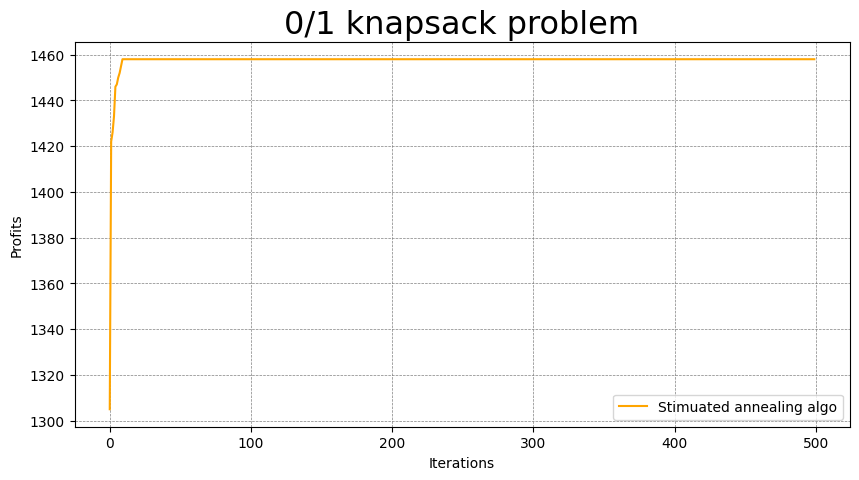

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

plt.xlabel('Iterations')
plt.ylabel('Profits')
plt.title('0/1 knapsack problem',size='23')

plt.plot(sa_results,color='orange' ,label='Stimuated annealing algo')
plt.legend(loc='lower right')
plt.savefig('./01_knapsack_SA.png')

plt.show()